## Especialização em Engenharia de Dados

### Introdução ao Processamento de Dados
#### Professor: MSc. Daniel Teófilo

---

# Trabalho Final

**Análise do Mercado Financeiro - Ações Petrobrás**


## 1. Descrição da API escolhida
### 1.1. Introdução à API yfinance
A API yfinance é uma biblioteca Python usada para acessar dados financeiros e de mercado fornecidos pelo Yahoo Finance. Ela permite aos usuários baixar dados históricos de preços de ações, obter informações sobre dividendos, eventos corporativos, entre outros.


### 2. Código para acessar os dados

### 2.1. Estrutura dos dados obtidos
Os dados históricos são obtidos em formato de DataFrame do pandas, com colunas para a data, preços de abertura, fechamento, máxima, mínima, volume, entre outros.


In [34]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
# Libs para anaálises gráficas
import seaborn as sns
import plotly.graph_objects as go
# Lib para ignorar avisos
import warnings
# Desabilitando avisos
warnings.filterwarnings('ignore')

In [35]:


petr4 = yf.Ticker("PETR4.SA")
Base_Dados = petr4.history(period="2y")


## 3. Transformação e limpeza de dados

In [ ]:
Base_Dados.drop(columns=['Dividends','Stock Splits'], inplace=True)

# Convertendo a coluna 'data' para datetime
Base_Dados = Base_Dados.reset_index()
Base_Dados = Base_Dados.rename(columns={'Date': 'Data', 
                                        'Open': 'Abertura', 
                                        'High': 'Maior',
                                        'Low':  'Menor',
                                        'Close': 'Fechamento'                                      
                                       })

# Remover a informação de fuso horário usando tz_localize(None)
Base_Dados['Data'] = Base_Dados['Data'].dt.tz_localize(None)
Base_Dados = Base_Dados.drop(Base_Dados.index[-1])

## 4. Análise exploratória dos dados


In [41]:
Base_Dados.head()

,Data,Abertura,Maior,Menor,Fechamento,Volume
0,2022-05-16,16.890330,17.201014,16.771973,17.067863,92075300
1,2022-05-17,17.260190,17.329230,16.836082,16.845945,90914700
2,2022-05-18,16.855805,17.043202,16.485944,16.569778,80986200
3,2022-05-19,16.530327,16.910051,16.436629,16.850872,63983100
4,2022-05-20,17.057997,17.176353,16.890327,17.176353,79589900


In [42]:
Base_Dados.shape

(499, 6)

In [43]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Data        499 non-null    datetime64[ns]
 1   Abertura    499 non-null    float64       
 2   Maior       499 non-null    float64       
 3   Menor       499 non-null    float64       
 4   Fechamento  499 non-null    float64       
 5   Volume      499 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 23.5 KB


In [44]:
Base_Dados.describe()

,Data,Abertura,Maior,Menor,Fechamento,Volume
count,499,499.000000,499.000000,499.000000,499.000000,4.990000e+02
mean,2023-05-12 21:47:15.270541056,25.151193,25.520142,24.813219,25.186715,6.376815e+07
min,2022-05-16 00:00:00,14.299374,14.887397,14.238923,14.447755,1.282670e+07
25%,2022-11-10 12:00:00,18.368390,18.725043,18.027974,18.350398,3.921780e+07
50%,2023-05-15 00:00:00,22.411581,22.927277,22.083228,22.505863,5.560530e+07
75%,2023-11-09 12:00:00,32.199226,32.550373,31.863639,32.184719,7.839715e+07
max,2024-05-14 00:00:00,41.840000,42.090000,41.509998,41.669998,3.195016e+08
std,NaN,7.725111,7.768572,7.705243,7.745378,3.540875e+07


In [45]:
# Series Temporais
Dados = Base_Dados.set_index('Data')

Dados.head()

,Abertura,Maior,Menor,Fechamento,Volume
Data,,,,,
2022-05-16,16.890330,17.201014,16.771973,17.067863,92075300
2022-05-17,17.260190,17.329230,16.836082,16.845945,90914700
2022-05-18,16.855805,17.043202,16.485944,16.569778,80986200
2022-05-19,16.530327,16.910051,16.436629,16.850872,63983100
2022-05-20,17.057997,17.176353,16.890327,17.176353,79589900


In [46]:
Dados.tail()

,Abertura,Maior,Menor,Fechamento,Volume
Data,,,,,
2024-05-08,40.349998,41.330002,40.310001,41.270000,25352000
2024-05-09,41.060001,41.840000,40.939999,41.669998,27206400
2024-05-10,41.840000,42.090000,41.500000,41.580002,27968700
2024-05-13,41.740002,41.970001,41.509998,41.619999,18394300
2024-05-14,40.759998,41.299999,40.160000,40.869999,53613200



### 5. Visualização gráfica

#### 5.1. Gráfico -  Análise das ações da Petrobras - Fechamento

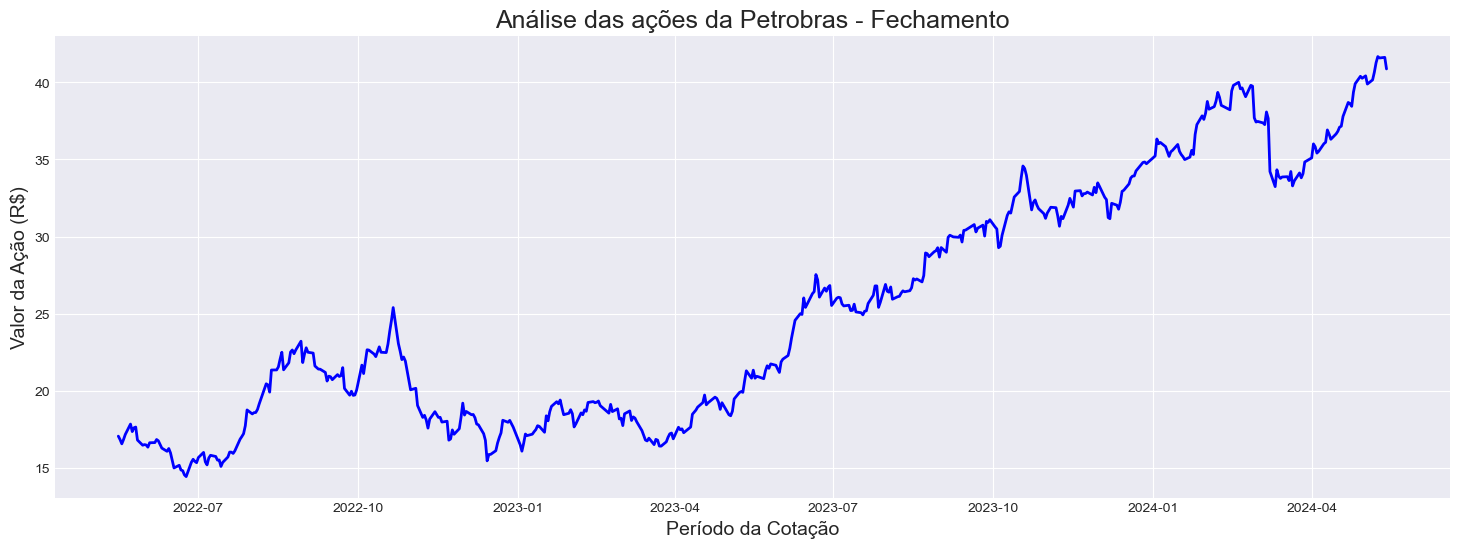

In [47]:

# Aplicando o estilo seaborn para uma estética limpa
plt.style.use('seaborn-darkgrid')

# Criando uma figura maior para melhor visibilidade
plt.figure(figsize=(18, 6))

# Definindo o título com um tamanho de fonte um pouco maior e alinhamento central
plt.title('Análise das ações da Petrobras - Fechamento', fontsize=18, loc='center')

# Plotando os dados com uma linha mais espessa para melhor visibilidade
plt.plot(Dados.index, Dados['Fechamento'], linewidth=2, color='blue')

# Adicionando uma grade para melhor legibilidade
plt.grid(True)

# Adicionando rótulos com tamanhos de fonte maiores
plt.xlabel('Período da Cotação', fontsize=14)
plt.ylabel('Valor da Ação (R$)', fontsize=14)

# Exibindo o gráfico
plt.show()


### 01. Insights do Gráfico:

1. **Tendência de Alta com Volatilidade:**
   - A tendência geral do preço das ações da Petrobras é de alta de julho de 2022 a maio de 2024. No entanto, há flutuações significativas dentro desse período, indicando volatilidade no mercado de ações. Pontos-chave de volatilidade podem ser observados em torno de outubro de 2022, janeiro de 2023 e abril de 2024.

2. **Períodos de Crescimento Rápido:**
   - Existem períodos distintos em que o preço das ações cresce rapidamente. Por exemplo, entre setembro de 2022 e outubro de 2022, e novamente de junho de 2023 a julho de 2023. Esses picos podem estar ligados a eventos específicos ou anúncios que impactam o sentimento dos investidores e o desempenho das ações.

3. **Níveis de Resistência e Suporte:**
   - Em torno de outubro de 2022, o preço das ações atingiu um pico próximo de R$ 25 antes de cair, sugerindo um possível nível de resistência. Da mesma forma, níveis de suporte podem ser inferidos em torno de R$15 em julho de 2022 e janeiro de 2023, onde o preço das ações não caiu abaixo desse ponto por um período significativo.




#### 5.2. Gráfico -  Análise das ações da Petrobras - Fechamento

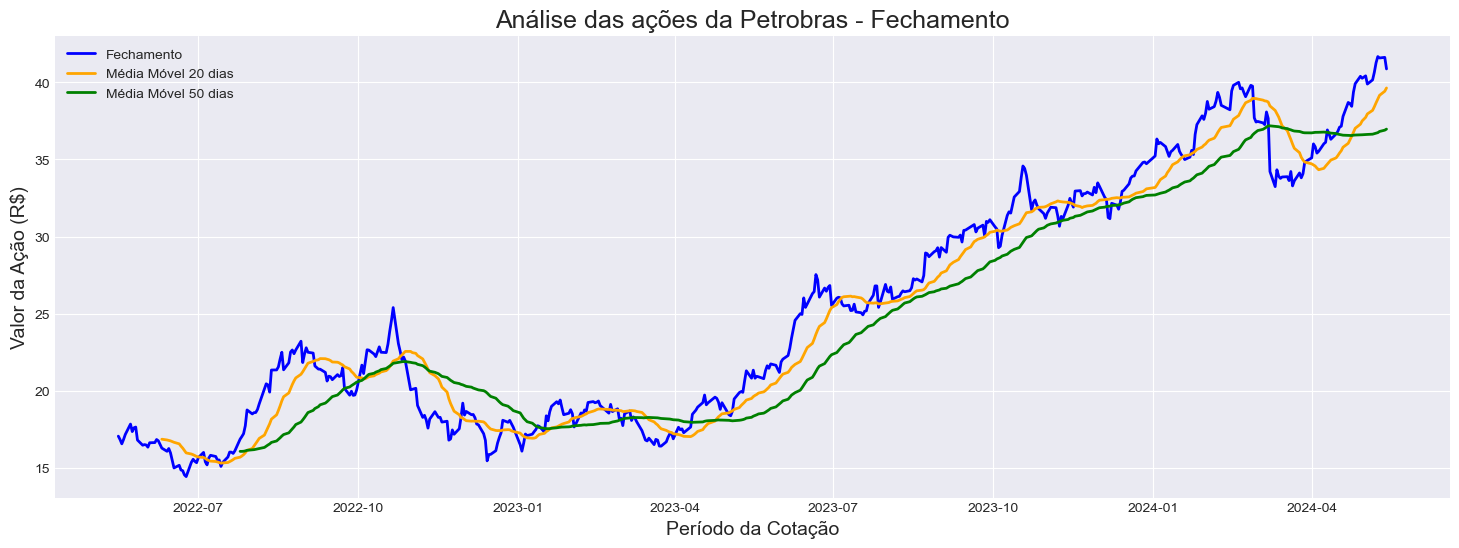

In [48]:

# Calculando médias móveis
Dados['MMS_20'] = Dados['Fechamento'].rolling(window=20).mean()
Dados['MMS_50'] = Dados['Fechamento'].rolling(window=50).mean()


plt.style.use('seaborn-darkgrid')


plt.figure(figsize=(18, 6))


plt.title('Análise das ações da Petrobras - Fechamento', fontsize=18, loc='center')


plt.plot(Dados.index, Dados['Fechamento'], linewidth=2, color='blue', label='Fechamento')
plt.plot(Dados.index, Dados['MMS_20'], linewidth=2, color='orange', label='Média Móvel 20 dias')
plt.plot(Dados.index, Dados['MMS_50'], linewidth=2, color='green', label='Média Móvel 50 dias')


plt.grid(True)


plt.xlabel('Período da Cotação', fontsize=14)
plt.ylabel('Valor da Ação (R$)', fontsize=14)


plt.legend()


plt.show()

### 02.Insights do Gráfico:

1. **Tendência de Alta Sustentada:**
   - O gráfico mostra uma tendência de alta clara no preço das ações da Petrobras desde julho de 2022 até maio de 2024. A inclusão das médias móveis (provavelmente uma média móvel curta e uma média móvel longa) ajuda a confirmar essa tendência, mostrando que o preço das ações frequentemente se mantém acima dessas médias, indicando um mercado altista.

2. **Pontos de Correção e Recuperação:**
   - Há vários pontos no gráfico onde o preço das ações passa por correções, mas subsequentemente se recupera. Por exemplo, em outubro de 2022 e em janeiro de 2023, o preço das ações caiu, mas logo após esses períodos, houve uma recuperação significativa. Isso pode indicar que, mesmo com volatilidade, há um suporte subjacente forte no preço das ações.

3. **Indicadores de Compra e Venda:**
   - As médias móveis também atuam como indicadores de compra e venda. Quando a média móvel curta cruza acima da média móvel longa (indicador de cruzamento dourado), pode ser um sinal de compra. Inversamente, quando a média móvel curta cruza abaixo da média móvel longa (indicador de cruzamento da morte), pode ser um sinal de venda. Esses cruzamentos são visíveis em várias partes do gráfico, sugerindo possíveis pontos de entrada e saída para investidores.



#### 5.3. Gráfico -  Variação Mensal do Preço das Ações da Petrobras - Fechamento

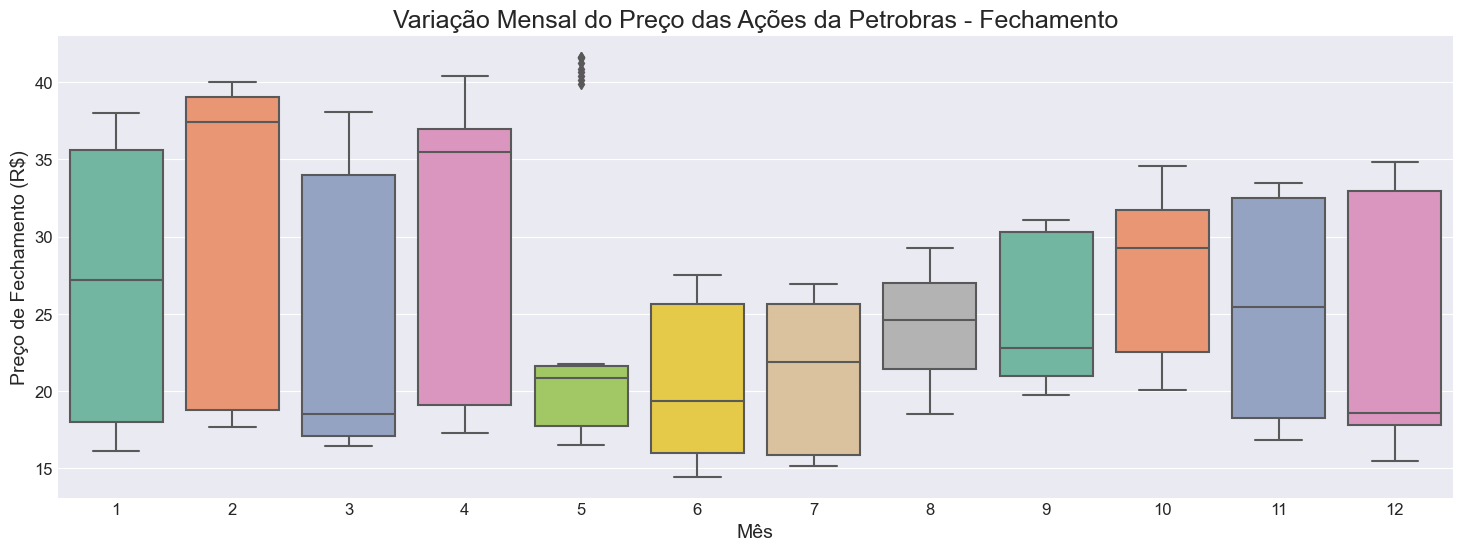

In [49]:

Base_Dados['Mes'] = Base_Dados['Data'].dt.month


plt.style.use('seaborn-darkgrid')


plt.figure(figsize=(18, 6))


sns.boxplot(data=Base_Dados, x='Mes', y='Fechamento', palette='Set2')


plt.title('Variação Mensal do Preço das Ações da Petrobras - Fechamento', fontsize=18, loc='center')


plt.xlabel('Mês', fontsize=14)
plt.ylabel('Preço de Fechamento (R$)', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Exibindo o gráfico
plt.show()


### 03.Insights do Gráfico:

1. **Variação Mensal no Preço das Ações:**
   - O gráfico de boxplot mostra claramente a variação mensal no preço das ações da Petrobras. Podemos observar que há meses em que os preços são mais voláteis, como fevereiro e abril, onde os intervalos interquartis (IQR) são maiores. Em contraste, maio apresenta uma menor variabilidade nos preços das ações, com a maior parte dos dados concentrados em um intervalo menor.

2. **Outliers em Maio:**
   - Maio apresenta vários outliers, indicando que houve dias específicos com preços de fechamento significativamente diferentes do padrão observado no restante do mês. Esses outliers podem ser causados por eventos excepcionais, notícias relevantes ou mudanças abruptas no mercado que afetaram o preço das ações.

3. **Tendência de Alta em Alguns Meses:**
   - Os meses de janeiro, março, abril, novembro e dezembro mostram medianas de preços de fechamento mais altas, indicando que nesses meses as ações tendem a ter um valor maior. Isso pode sugerir uma tendência sazonal onde os preços das ações da Petrobras são mais altos no início e final do ano.


#### 5.4. Gráfico -  Análise das Ações da Petrobras - Candlestick

In [50]:

# Criando o gráfico de candlestick
Grafico = go.Figure(
    data=[
        go.Candlestick(
            x=Dados.index,
            open=Dados['Abertura'],
            high=Dados['Maior'],
            low=Dados['Menor'],
            close=Dados['Fechamento'],
            increasing_line_color='green',
            decreasing_line_color='red'
        )
    ]
)


Grafico.update_layout(
    title='Análise das Ações da Petrobras - Candlestick',
    xaxis_title='Período da Cotação',
    yaxis_title='Preço da Ação (R$)',
    xaxis_rangeslider_visible=False,
    template='seaborn',
    title_font_size=20,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    legend_title_font_size=12
)

# Exibindo o gráfico
Grafico.show()




### 5.2. Aplicabilidade dos insights apresentados acima
- **Investidores individuais**: Uso dos dados para gerenciar portfólios e estratégias de investimento.
- **Analistas financeiros**: Suporte em análises e previsões de mercado.
- **Empresas**: Avaliação de performance e planejamento financeiro.